In [41]:
# import relevant libraries
import seaborn as sns
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import xgboost as xgb
plt.style.use('fivethirtyeight')

In [2]:
# read data
df = pd.read_csv("climate_data.csv")
df

,Date Time,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg)
0,01.01.2009 00:10:00,996.52,-8.02,265.40,-8.90,93.30,3.33,3.11,0.22,1.94,3.12,1307.75,1.03,1.75,152.3
1,01.01.2009 00:20:00,996.57,-8.41,265.01,-9.28,93.40,3.23,3.02,0.21,1.89,3.03,1309.80,0.72,1.50,136.1
2,01.01.2009 00:30:00,996.53,-8.51,264.91,-9.31,93.90,3.21,3.01,0.20,1.88,3.02,1310.24,0.19,0.63,171.6
3,01.01.2009 00:40:00,996.51,-8.31,265.12,-9.07,94.20,3.26,3.07,0.19,1.92,3.08,1309.19,0.34,0.50,198.0
4,01.01.2009 00:50:00,996.51,-8.27,265.15,-9.04,94.10,3.27,3.08,0.19,1.92,3.09,1309.00,0.32,0.63,214.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
420546,31.12.2016 23:20:00,1000.07,-4.05,269.10,-8.13,73.10,4.52,3.30,1.22,2.06,3.30,1292.98,0.67,1.52,240.0
420547,31.12.2016 23:30:00,999.93,-3.35,269.81,-8.06,69.71,4.77,3.32,1.44,2.07,3.32,1289.44,1.14,1.92,234.3
420548,31.12.2016 23:40:00,999.82,-3.16,270.01,-8.21,67.91,4.84,3.28,1.55,2.05,3.28,1288.39,1.08,2.00,215.2
420549,31.12.2016 23:50:00,999.81,-4.23,268.94,-8.53,71.80,4.46,3.20,1.26,1.99,3.20,1293.56,1.49,2.16,225.8


In [3]:
# check for null data
df.isnull().sum()

Date Time          0
p (mbar)           0
T (degC)           0
Tpot (K)           0
Tdew (degC)        0
rh (%)             0
VPmax (mbar)       0
VPact (mbar)       0
VPdef (mbar)       0
sh (g/kg)          0
H2OC (mmol/mol)    0
rho (g/m**3)       0
wv (m/s)           0
max. wv (m/s)      0
wd (deg)           0
dtype: int64

In [4]:
# check for dupicated data
df.duplicated().sum()

327

In [5]:
# drop duplicated data
df = df.drop_duplicates()
df

,Date Time,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg)
0,01.01.2009 00:10:00,996.52,-8.02,265.40,-8.90,93.30,3.33,3.11,0.22,1.94,3.12,1307.75,1.03,1.75,152.3
1,01.01.2009 00:20:00,996.57,-8.41,265.01,-9.28,93.40,3.23,3.02,0.21,1.89,3.03,1309.80,0.72,1.50,136.1
2,01.01.2009 00:30:00,996.53,-8.51,264.91,-9.31,93.90,3.21,3.01,0.20,1.88,3.02,1310.24,0.19,0.63,171.6
3,01.01.2009 00:40:00,996.51,-8.31,265.12,-9.07,94.20,3.26,3.07,0.19,1.92,3.08,1309.19,0.34,0.50,198.0
4,01.01.2009 00:50:00,996.51,-8.27,265.15,-9.04,94.10,3.27,3.08,0.19,1.92,3.09,1309.00,0.32,0.63,214.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
420546,31.12.2016 23:20:00,1000.07,-4.05,269.10,-8.13,73.10,4.52,3.30,1.22,2.06,3.30,1292.98,0.67,1.52,240.0
420547,31.12.2016 23:30:00,999.93,-3.35,269.81,-8.06,69.71,4.77,3.32,1.44,2.07,3.32,1289.44,1.14,1.92,234.3
420548,31.12.2016 23:40:00,999.82,-3.16,270.01,-8.21,67.91,4.84,3.28,1.55,2.05,3.28,1288.39,1.08,2.00,215.2
420549,31.12.2016 23:50:00,999.81,-4.23,268.94,-8.53,71.80,4.46,3.20,1.26,1.99,3.20,1293.56,1.49,2.16,225.8


## Data preprocessing

In [6]:
# update index of table
df = df.set_index(df['Date Time'])
# convert index datatype to datetime
df.index = pd.to_datetime(df.index,format="%d.%m.%Y %H:%M:%S",dayfirst=True)

In [7]:
# remove "Date Time" column
df = df.drop(columns="Date Time")
df

,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg)
Date Time,,,,,,,,,,,,,,
2009-01-01 00:10:00,996.52,-8.02,265.40,-8.90,93.30,3.33,3.11,0.22,1.94,3.12,1307.75,1.03,1.75,152.3
2009-01-01 00:20:00,996.57,-8.41,265.01,-9.28,93.40,3.23,3.02,0.21,1.89,3.03,1309.80,0.72,1.50,136.1
2009-01-01 00:30:00,996.53,-8.51,264.91,-9.31,93.90,3.21,3.01,0.20,1.88,3.02,1310.24,0.19,0.63,171.6
2009-01-01 00:40:00,996.51,-8.31,265.12,-9.07,94.20,3.26,3.07,0.19,1.92,3.08,1309.19,0.34,0.50,198.0
2009-01-01 00:50:00,996.51,-8.27,265.15,-9.04,94.10,3.27,3.08,0.19,1.92,3.09,1309.00,0.32,0.63,214.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-12-31 23:20:00,1000.07,-4.05,269.10,-8.13,73.10,4.52,3.30,1.22,2.06,3.30,1292.98,0.67,1.52,240.0
2016-12-31 23:30:00,999.93,-3.35,269.81,-8.06,69.71,4.77,3.32,1.44,2.07,3.32,1289.44,1.14,1.92,234.3
2016-12-31 23:40:00,999.82,-3.16,270.01,-8.21,67.91,4.84,3.28,1.55,2.05,3.28,1288.39,1.08,2.00,215.2


In [9]:
df.columns

Index(['p (mbar)', 'T (degC)', 'Tpot (K)', 'Tdew (degC)', 'rh (%)',
       'VPmax (mbar)', 'VPact (mbar)', 'VPdef (mbar)', 'sh (g/kg)',
       'H2OC (mmol/mol)', 'rho (g/m**3)', 'wv (m/s)', 'max. wv (m/s)',
       'wd (deg)'],
      dtype='object')

In [10]:
# drop unnecessary columns
df = df.drop(columns=['p (mbar)', 'Tpot (K)', 'Tdew (degC)', 'rh (%)',
       'VPmax (mbar)', 'VPact (mbar)', 'VPdef (mbar)', 'sh (g/kg)',
       'H2OC (mmol/mol)', 'rho (g/m**3)', 'wv (m/s)', 'max. wv (m/s)',
       'wd (deg)'])
df

,T (degC)
Date Time,
2009-01-01 00:10:00,-8.02
2009-01-01 00:20:00,-8.41
2009-01-01 00:30:00,-8.51
2009-01-01 00:40:00,-8.31
2009-01-01 00:50:00,-8.27
...,...
2016-12-31 23:20:00,-4.05
2016-12-31 23:30:00,-3.35
2016-12-31 23:40:00,-3.16


In [12]:
# generate summary table for temperature attribute
df.describe()

,T (degC)
count,420224.000000
mean,9.442421
std,8.421135
min,-23.010000
25%,3.360000
50%,9.400000
75%,15.460000
max,37.280000


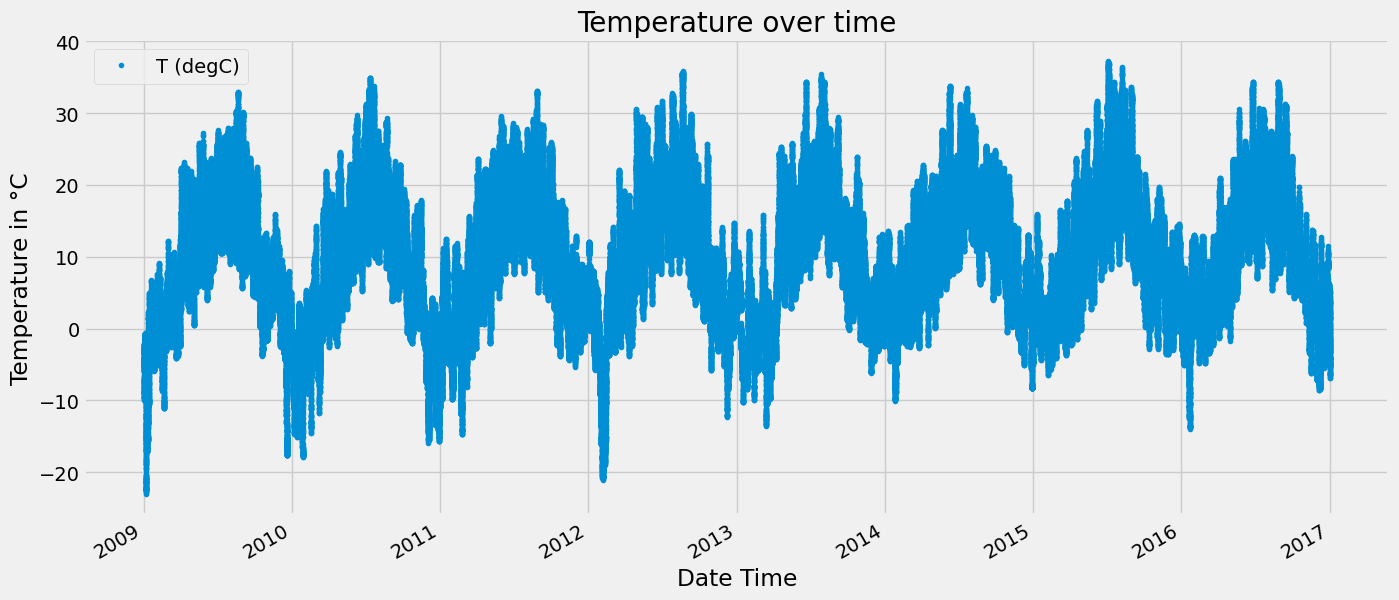

In [16]:
# identify outliers
fig, ax = plt.subplots(figsize=(15,7))
df.plot(ax=ax, title="Temperature over time",style=".")
plt.ylabel("Temperature in °C")
plt.show()

No outliers found

## Create features

In [20]:
# Design function to create features
def create_features(df):
    df = df.copy()
    df['year'] = df.index.year
    df['month'] = df.index.month
    df['day'] = df.index.day
    df['hour'] = df.index.hour
    df['dayofweek'] = df.index.dayofweek
    df['quarter'] = df.index.quarter
    df['weekofmonth'] = df.index.isocalendar().week
    return df

In [21]:
# Apply function to the dataset
df = create_features(df)
df

,T (degC),year,month,day,hour,dayofweek,quarter,weekofmonth
Date Time,,,,,,,,
2009-01-01 00:10:00,-8.02,2009,1,1,0,3,1,1
2009-01-01 00:20:00,-8.41,2009,1,1,0,3,1,1
2009-01-01 00:30:00,-8.51,2009,1,1,0,3,1,1
2009-01-01 00:40:00,-8.31,2009,1,1,0,3,1,1
2009-01-01 00:50:00,-8.27,2009,1,1,0,3,1,1
...,...,...,...,...,...,...,...,...
2016-12-31 23:20:00,-4.05,2016,12,31,23,5,4,52
2016-12-31 23:30:00,-3.35,2016,12,31,23,5,4,52
2016-12-31 23:40:00,-3.16,2016,12,31,23,5,4,52


## Create lag

In [22]:
# Design function to create lag features
def create_lag(df):
    target_map = df['T (degC)'].to_dict()
    df['lag1'] = (df.index - pd.Timedelta(days=364)).map(target_map)
    df['lag2'] = (df.index - pd.Timedelta(days=728)).map(target_map)
    df['lag3'] = (df.index - pd.Timedelta(days=1092)).map(target_map)
    return df

In [23]:
# Apply function to the dataset
df = create_lag(df)
df 

,T (degC),year,month,day,hour,dayofweek,quarter,weekofmonth,lag1,lag2,lag3
Date Time,,,,,,,,,,,
2009-01-01 00:10:00,-8.02,2009,1,1,0,3,1,1,NaN,NaN,NaN
2009-01-01 00:20:00,-8.41,2009,1,1,0,3,1,1,NaN,NaN,NaN
2009-01-01 00:30:00,-8.51,2009,1,1,0,3,1,1,NaN,NaN,NaN
2009-01-01 00:40:00,-8.31,2009,1,1,0,3,1,1,NaN,NaN,NaN
2009-01-01 00:50:00,-8.27,2009,1,1,0,3,1,1,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
2016-12-31 23:20:00,-4.05,2016,12,31,23,5,4,52,-2.41,1.54,6.82
2016-12-31 23:30:00,-3.35,2016,12,31,23,5,4,52,-2.52,1.57,6.78
2016-12-31 23:40:00,-3.16,2016,12,31,23,5,4,52,-2.62,1.63,6.69


## Time-series using cross validation

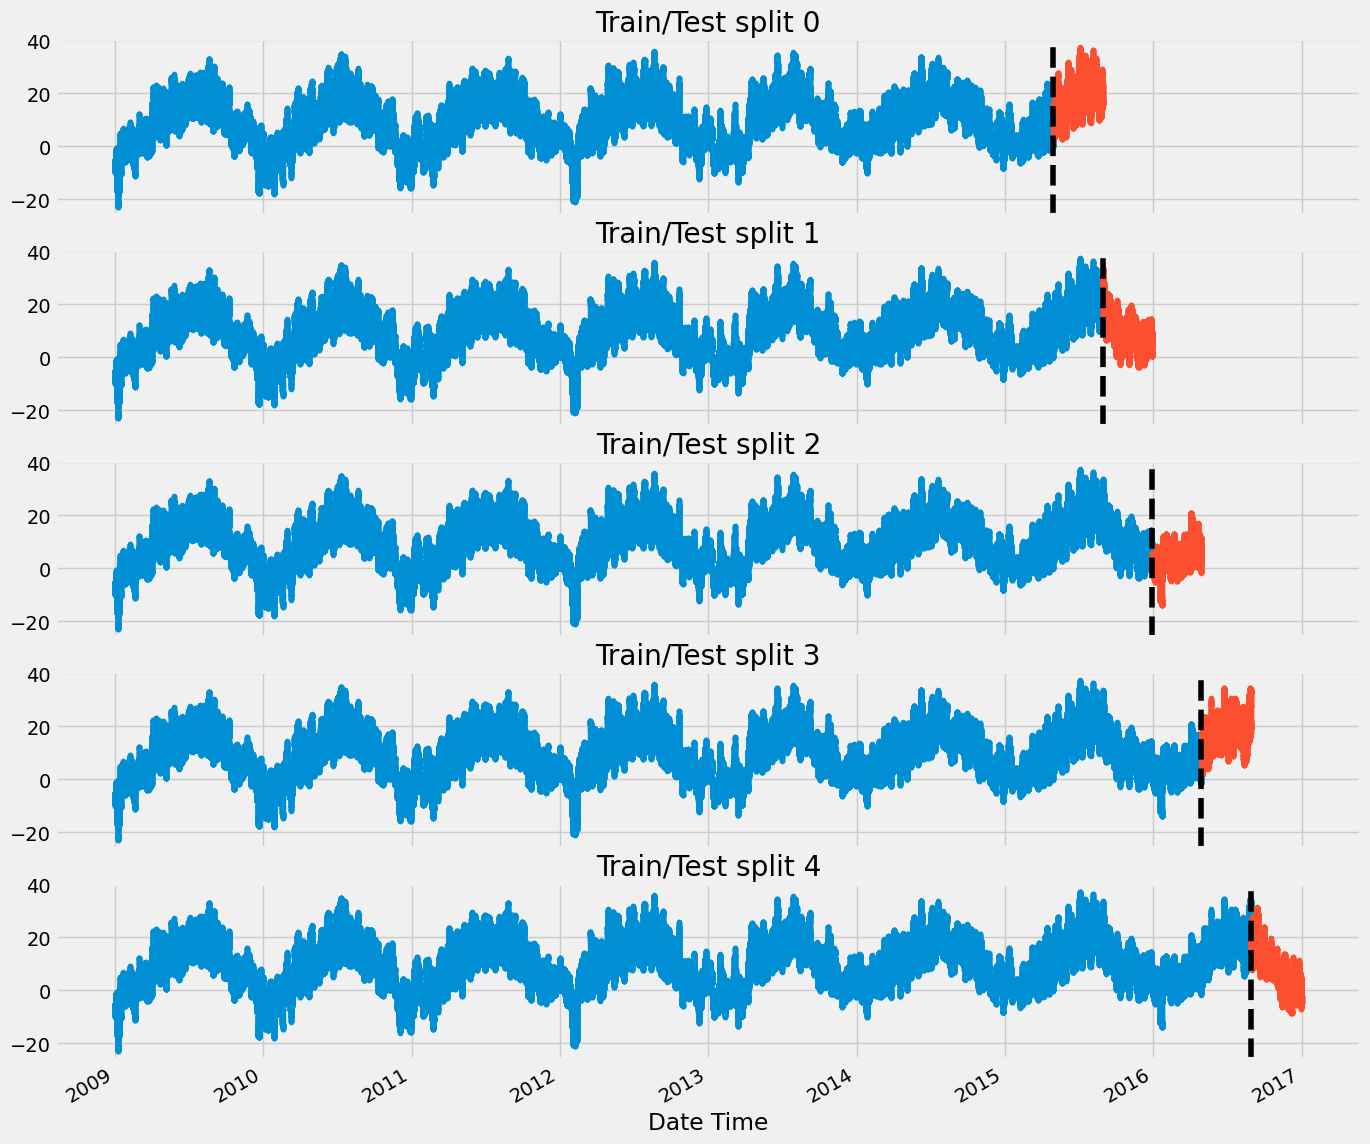

In [36]:
from sklearn.model_selection import TimeSeriesSplit
tss = TimeSeriesSplit(n_splits=5, test_size=24*365*2,gap=50)
folds = 0 
fig, axs = plt.subplots(5,1,figsize=(15,15),sharex=True)
for train_idx,val_idx in tss.split(df):
    train = df.iloc[train_idx]
    test = df.iloc[val_idx]

    train['T (degC)'].plot(ax=axs[folds],label="Train data",style=".",title=f"Train/Test split {folds}")
    test['T (degC)'].plot(ax=axs[folds],label="Test data",style=".")
    axs[folds].axvline(test.index.min(),color="black",ls="--")
    folds += 1

In [39]:
df.columns

Index(['T (degC)', 'year', 'month', 'day', 'hour', 'dayofweek', 'quarter',
       'weekofmonth', 'lag1', 'lag2', 'lag3'],
      dtype='object')

## Training using cross-validation

In [45]:
from sklearn.metrics import mean_squared_error
tss = TimeSeriesSplit(n_splits = 5,test_size=24*365*2,gap = 50)
df = df.sort_index()
preds = []
scores = []
for train_idx,val_idx in tss.split(df):
    train = df.iloc[train_idx]
    test = df.iloc[val_idx]

    FEATURES = ['year', 'month', 'day', 'hour', 'dayofweek', 'quarter',
    'weekofmonth', 'lag1', 'lag2', 'lag3']
    TARGET = 'T (degC)'

    x_train = train[FEATURES]
    y_train = train[TARGET]

    x_test = test[FEATURES]
    y_test = test[TARGET]

    reg = xgb.XGBRegressor(base_score =0.5, booster='gbtree',n_estimators=1000,early_stopping_rounds=50,objective='reg:linear',max_depth=3,learning_rate = 0.01)
    reg.fit(x_train,y_train,eval_set=[(x_train,y_train),(x_test,y_test)],verbose=100)

    pred = reg.predict(x_test)
    preds.append(pred)
    score = np.sqrt(mean_squared_error(y_test,pred))
    scores.append(score)

[0]	validation_0-rmse:11.84565	validation_1-rmse:18.07893


C:\Users\tousi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\xgboost\core.py:160: UserWarning: [14:01:36] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\objective\regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


[100]	validation_0-rmse:6.42746	validation_1-rmse:8.98533
[200]	validation_0-rmse:4.91454	validation_1-rmse:5.77615
[300]	validation_0-rmse:4.50719	validation_1-rmse:4.91448
[400]	validation_0-rmse:4.31621	validation_1-rmse:4.59996
[500]	validation_0-rmse:4.21627	validation_1-rmse:4.45954
[600]	validation_0-rmse:4.15302	validation_1-rmse:4.39967
[700]	validation_0-rmse:4.10657	validation_1-rmse:4.37337
[800]	validation_0-rmse:4.07303	validation_1-rmse:4.36263
[900]	validation_0-rmse:4.04245	validation_1-rmse:4.34735
[999]	validation_0-rmse:4.01167	validation_1-rmse:4.33512
[0]	validation_0-rmse:12.23098	validation_1-rmse:10.39374


C:\Users\tousi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\xgboost\core.py:160: UserWarning: [14:01:45] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\objective\regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


[100]	validation_0-rmse:6.53428	validation_1-rmse:5.88058
[200]	validation_0-rmse:4.93982	validation_1-rmse:5.13967
[300]	validation_0-rmse:4.51961	validation_1-rmse:4.92369
[400]	validation_0-rmse:4.33633	validation_1-rmse:4.90383
[500]	validation_0-rmse:4.23629	validation_1-rmse:4.87593
[600]	validation_0-rmse:4.17415	validation_1-rmse:4.83593
[700]	validation_0-rmse:4.12398	validation_1-rmse:4.81122
[787]	validation_0-rmse:4.09157	validation_1-rmse:4.81538
[0]	validation_0-rmse:12.15163	validation_1-rmse:6.01002


C:\Users\tousi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\xgboost\core.py:160: UserWarning: [14:01:53] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\objective\regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


[100]	validation_0-rmse:6.51773	validation_1-rmse:4.27514
[186]	validation_0-rmse:5.06901	validation_1-rmse:4.26706
[0]	validation_0-rmse:11.94151	validation_1-rmse:17.70411


C:\Users\tousi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\xgboost\core.py:160: UserWarning: [14:01:56] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\objective\regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


[100]	validation_0-rmse:6.45022	validation_1-rmse:8.23897
[200]	validation_0-rmse:4.93911	validation_1-rmse:5.05831
[300]	validation_0-rmse:4.53283	validation_1-rmse:4.28425
[400]	validation_0-rmse:4.37084	validation_1-rmse:4.10357
[445]	validation_0-rmse:4.32618	validation_1-rmse:4.20459
[0]	validation_0-rmse:12.24653	validation_1-rmse:10.63680


C:\Users\tousi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\xgboost\core.py:160: UserWarning: [14:02:02] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\objective\regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


[100]	validation_0-rmse:6.51753	validation_1-rmse:5.88366
[200]	validation_0-rmse:4.94059	validation_1-rmse:4.86836
[300]	validation_0-rmse:4.52450	validation_1-rmse:4.76633
[349]	validation_0-rmse:4.43596	validation_1-rmse:4.77528


In [47]:
print(f"Average scores: {np.mean(scores)}")
print(f"All scores:\n{scores}")

Average scores: 4.442358330937513
All scores:
[4.334654740745352, 4.807430308875428, 4.212786728810565, 4.091602145543363, 4.765317730712858]
